In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random

In [102]:
rentals = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/streeteasy.csv")

In [103]:
rentals.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


In [104]:
rentals.no_fee.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_roofdeck.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_washer_dryer.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_doorman.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_elevator.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_dishwasher.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_patio.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_gym.replace({1:'yes', 0:'no'}, inplace=True)

In [105]:
rentals.describe(include='all')

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,93,15,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no,no,no,no,no,no,Upper West Side,All Downtown,Manhattan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2852,4357,4331,3860,3800,4222,4772,4281,579,1229,3539
mean,5526.909400,5.122007e+07,4536.920800,1.395700,1.321600,920.101400,5.079200,10.190200,52.093200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3263.692417,2.802283e+07,2929.838953,0.961018,0.565542,440.150464,5.268897,10.565361,40.224501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,7.107000e+03,1250.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2699.750000,2.699811e+07,2750.000000,1.000000,1.000000,633.000000,2.000000,3.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5456.500000,5.069894e+07,3600.000000,1.000000,1.000000,800.000000,4.000000,6.000000,44.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8306.000000,7.572064e+07,5200.000000,2.000000,2.000000,1094.000000,6.000000,14.000000,89.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
rentals.columns

Index(['rental_id', 'building_id', 'rent', 'bedrooms', 'bathrooms',
       'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee',
       'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator',
       'has_dishwasher', 'has_patio', 'has_gym', 'neighborhood', 'submarket',
       'borough'],
      dtype='object')

In [107]:
rentals.shape

(5000, 20)

In [108]:
rentals.isnull().any()

rental_id           False
building_id         False
rent                False
bedrooms            False
bathrooms           False
size_sqft           False
min_to_subway       False
floor               False
building_age_yrs    False
no_fee              False
has_roofdeck        False
has_washer_dryer    False
has_doorman         False
has_elevator        False
has_dishwasher      False
has_patio           False
has_gym             False
neighborhood        False
submarket           False
borough             False
dtype: bool

In [109]:
rentals.dtypes

rental_id             int64
building_id           int64
rent                  int64
bedrooms            float64
bathrooms             int64
size_sqft             int64
min_to_subway         int64
floor               float64
building_age_yrs      int64
no_fee               object
has_roofdeck         object
has_washer_dryer     object
has_doorman          object
has_elevator         object
has_dishwasher       object
has_patio            object
has_gym              object
neighborhood         object
submarket            object
borough              object
dtype: object

## Univariate (one variable)

### Quantitative

# Rent

Exploring the rent value:


1.   mean/average
2.   median
3. comparing rent mean and median for probable skeweness/outliers
4. mode (not accurate describtive statistic, since rent can have totally different values)



In [110]:
rent_mean = np.mean(rentals.rent)
print(rent_mean)

4536.9208


In [111]:
rent_median = np.median(rentals.rent)
print(rent_median)

3600.0


The median (3600) is less than the mean (4536), which could indicate a possible right-side skeweness or outliers

> Trimming 10% of both sides of the data - leaving 80% - to examine the effect of outliers.



In [112]:
import scipy.stats as stat
stat.trim_mean(rentals.rent, 0.1)

3980.253

In [113]:
# for quantitive data, it is a better practice to report range of values for mode
# another way to get the mode is: rentals.rent.value_counts().head(1)
rent_mode = stat.mode(rentals.rent)
print('Mode or most common rent price is', str(rent_mode[0][0]), 'it appeared', str(rent_mode[1][0]), 'times')

Mode or most common rent price is 3500 it appeared 102 times


In [114]:
rent_minimum = np.min(rentals.rent)
rent_maximum = np.max(rentals.rent)
print('minimum rent price is', rent_minimum , 'and maximum is', rent_maximum)
print('range is', rent_maximum-rent_minimum)
rent_iqr = stat.iqr(rentals.rent)
print(rent_iqr)

minimum rent price is 1250 and maximum is 20000
range is 18750
2450.0


The range of rent prices is 18,750 from 1250 to 20,000. To dimiss the impact of outliers on range, we can get the interquartile range (IQR) or where 50% of data falls. In this example, 50% of rent prices has a range of 2450 from 2750 (Q1-25%) to 5200 (Q3-75%).

# Histograms of Rent

Using matplotlib (plt.hist) and seaborn (sns.histplot) to plot a histogram of rent

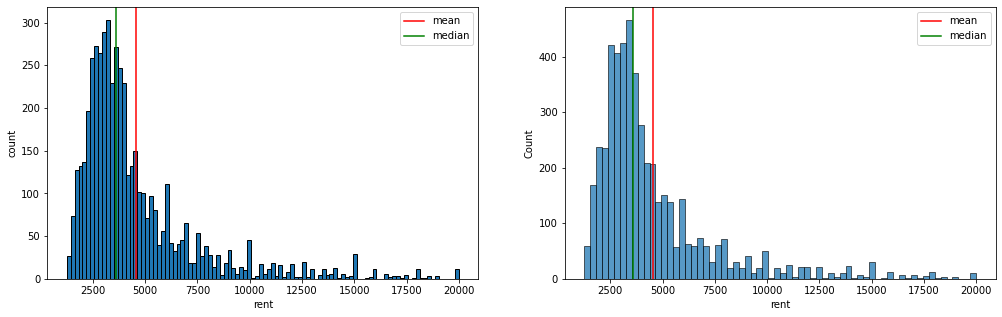

In [115]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,5))

ax1.hist(rentals.rent, bins= 100, edgecolor= 'black')
ax1.axvline(x = rent_mean, color = 'r', label= 'mean')
ax1.axvline(x= rent_median, color= 'g', label= 'median')
ax1.set(xlabel= 'rent', ylabel= 'count')
ax1.legend()

ax2 = sns.histplot(rentals.rent, kde= False)
ax2.axvline(x= rent_mean, color= 'r', label = 'mean')
ax2.axvline(x= rent_median, color= 'g', label = 'median')
ax2.legend()

plt.subplots_adjust(hspace= 0.8)
plt.show()

(array([ 497., 1282., 1279.,  606.,  345.,  272.,  183.,  112.,   85.,
          76.,   55.,   31.,   37.,   35.,   40.,   14.,   14.,   18.,
           8.,   11.]),
 array([ 1250. ,  2187.5,  3125. ,  4062.5,  5000. ,  5937.5,  6875. ,
         7812.5,  8750. ,  9687.5, 10625. , 11562.5, 12500. , 13437.5,
        14375. , 15312.5, 16250. , 17187.5, 18125. , 19062.5, 20000. ]),
 <a list of 20 Patch objects>)

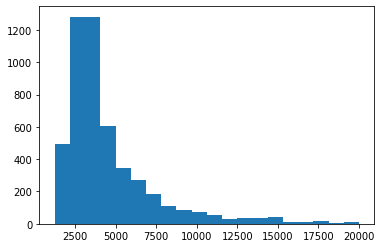

In [116]:
# use this line of code to extract bins values for the next line of code
plt.hist(rentals.rent, bins= 20)

In [117]:
# to get the conts in each bin, use the line of code below
rentals.rent.value_counts(bins= [1250, 2187.5, 3125, 4062.5, 5000, 5937.5, 6875, 7812.5, 8750, 9687.5, 10625, 11562.5, 12500, 13437.5, 14375, 15312.5, 16250, 17187.5, 18125, 19062.5, 20000]).sort_index()

(1249.999, 2187.5]     497
(2187.5, 3125.0]      1290
(3125.0, 4062.5]      1271
(4062.5, 5000.0]       642
(5000.0, 5937.5]       309
(5937.5, 6875.0]       273
(6875.0, 7812.5]       182
(7812.5, 8750.0]       116
(8750.0, 9687.5]        81
(9687.5, 10625.0]       76
(10625.0, 11562.5]      55
(11562.5, 12500.0]      51
(12500.0, 13437.5]      17
(13437.5, 14375.0]      35
(14375.0, 15312.5]      40
(15312.5, 16250.0]      14
(16250.0, 17187.5]      14
(17187.5, 18125.0]      18
(18125.0, 19062.5]       8
(19062.5, 20000.0]      11
Name: rent, dtype: int64

By plotting a histogram of rent (to check distribution of data)

> when using 20 bins: we notice that 1290 rent prices fall in the 2nd bin (2187.5 - 3125) followed by 1271 rent prices in the 3rd bin (3125 - 4062.5)

> the area below the median (50%) = the area above the median (50%), clearer to visualize when bins = 100





To visualize Interquartile range (50% of rent data)

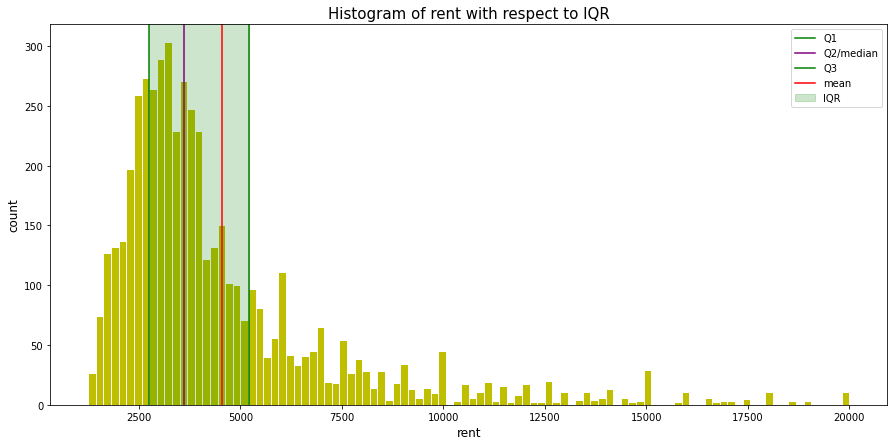

In [118]:
plt.figure(figsize=(15,7))
plt.hist(rentals.rent, bins= 100, color= 'y', edgecolor= 'white')

q1, q2, q3 = np.quantile(rentals.rent, 0.25), np.quantile(rentals.rent, 0.50), np.quantile(rentals.rent, 0.75)

plt.axvline(x= q1, color= 'g', label= 'Q1')
plt.axvline(x= q2, color= 'purple', label= 'Q2/median')
plt.axvline(x= q3, color= 'g', label= 'Q3')
plt.axvline(x= rent_mean, color= 'r', label= 'mean')
plt.axvspan(xmin= q1, xmax= q3 , color= 'g' , alpha= 0.2, label= 'IQR')

plt.title('Histogram of rent with respect to IQR', fontsize= 15)
plt.xlabel('rent', fontsize= 12)
plt.ylabel('count', fontsize= 12)

plt.legend()
plt.show()

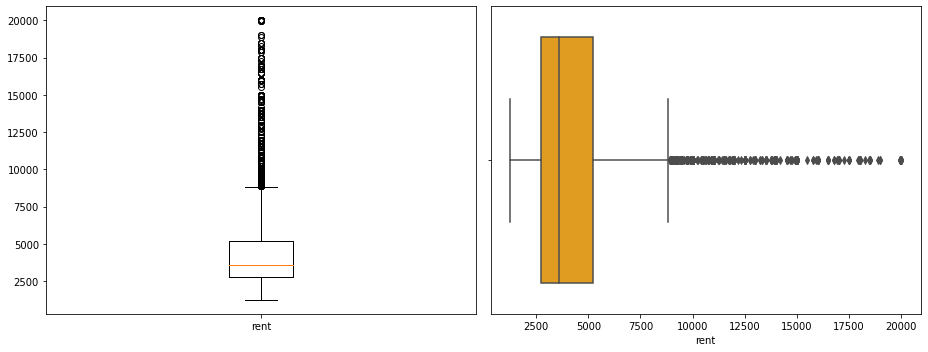

In [119]:
# Boxplot of rent using matplotlib and seaborn

f , (ax1, ax2) = plt.subplots(1 , 2, figsize=(13, 5))

ax1.boxplot(rentals.rent)
ax1.set_xticklabels(['rent'])
ax2 = sns.boxplot(x = rentals.rent, color = 'orange')

plt.tight_layout()
plt.show()

# Building Age

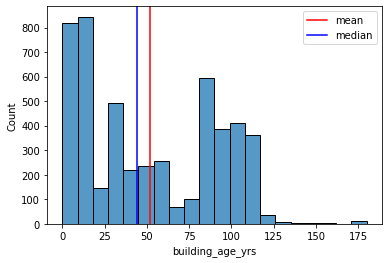

In [120]:
sns.histplot(rentals.building_age_yrs)
plt.axvline(x= np.mean(rentals.building_age_yrs), color= 'r', label= 'mean')
plt.axvline(x= np.median(rentals.building_age_yrs), color= 'b', label= 'median')
plt.legend()

plt.show()

In [121]:
building_age_min = np.min(rentals.building_age_yrs)
building_age_max = np.max(rentals.building_age_yrs)
print('The most modern building is', building_age_min, 'years and the oldest is', building_age_max, 'years')

The most modern building is 0 years and the oldest is 180 years


To investigate the data even more

(array([818., 844., 148., 491., 219., 236., 255.,  67., 101., 596., 386.,
        413., 361.,  35.,   9.,   5.,   3.,   3.,   0.,  10.]),
 array([  0.,   9.,  18.,  27.,  36.,  45.,  54.,  63.,  72.,  81.,  90.,
         99., 108., 117., 126., 135., 144., 153., 162., 171., 180.]),
 <a list of 20 Patch objects>)

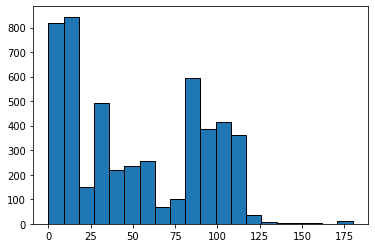

In [122]:
# to get the bin values for the next line of code
plt.hist(rentals.building_age_yrs, bins= 20, edgecolor= 'black')

In [123]:
# to find the counts in each bin
rentals.building_age_yrs.value_counts(bins= [0, 9, 18, 27, 36, 45, 54, 63, 72, 81, 90, 99, 108, 117, 126, 135, 144, 153, 162, 171, 180]).sort_index()

(-0.001, 9.0]     995
(9.0, 18.0]       702
(18.0, 27.0]      163
(27.0, 36.0]      455
(36.0, 45.0]      207
(45.0, 54.0]      267
(54.0, 63.0]      223
(63.0, 72.0]       66
(72.0, 81.0]      112
(81.0, 90.0]      636
(90.0, 99.0]      345
(99.0, 108.0]     421
(108.0, 117.0]    359
(117.0, 126.0]     25
(126.0, 135.0]      3
(135.0, 144.0]      5
(144.0, 153.0]      3
(153.0, 162.0]      3
(162.0, 171.0]      0
(171.0, 180.0]     10
Name: building_age_yrs, dtype: int64

In [124]:
# to confirm the count we got in the line above. check the count of buildings that are 9 years or less (counts of the 1st bin) that are offered for renting
# output has 995 rows/enteries
# also, can use: rentals[rentals.building_age_yrs <= 9].shape
rentals[rentals.building_age_yrs <= 9]

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
8,5465,73060494,3500,1.0,1,996,9,7.0,3,yes,no,no,no,no,no,no,no,Astoria,Northwest Queens,Queens
10,4318,57792653,3900,3.0,2,1000,4,9.0,8,no,no,no,no,yes,no,no,no,Greenwood,South Brooklyn,Brooklyn
14,9507,84137202,15000,2.0,2,1715,0,30.0,2,no,no,no,no,no,no,no,no,Flatiron,All Downtown,Manhattan
25,9736,5154242,1700,1.0,1,730,10,3.0,7,no,no,no,no,no,no,no,no,Briarwood,Northeast Queens,Queens
33,849,26340900,2750,1.0,1,700,12,3.0,9,yes,no,no,no,no,no,no,no,Clinton Hill,Northwest Brooklyn,Brooklyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,1721,93684714,4200,2.0,2,977,1,5.0,5,yes,no,no,no,no,no,no,no,Downtown Brooklyn,Northwest Brooklyn,Brooklyn
4984,10787,89197252,3800,1.0,1,615,2,25.0,9,no,no,no,no,no,no,no,no,Midtown West,All Midtown,Manhattan
4995,1964,73060494,2650,1.0,1,686,9,4.0,3,yes,no,no,no,no,no,no,no,Astoria,Northwest Queens,Queens
4996,5686,92994390,6675,2.0,2,988,5,10.0,9,yes,yes,yes,yes,yes,yes,no,yes,Tribeca,All Downtown,Manhattan


In [125]:
rentals[rentals.building_age_yrs == 0]['borough'].value_counts(normalize= True)

Queens       0.478261
Manhattan    0.405797
Brooklyn     0.115942
Name: borough, dtype: float64

In [126]:
rentals[rentals.building_age_yrs == 180]['neighborhood'].value_counts(normalize= True)

Financial District    0.888889
West Village          0.111111
Name: neighborhood, dtype: float64

The average building age offered for renting is 52 years, with:

>  995 buildings that are 9 years or less


> 69 new buildings (less than year old): 47.8% of them are in Queens, 40.6% in Manhattan and 11.6% in Brooklyn.


> The rentals also offer some old buildings that are 100 and above years old. There are 829 buildings that are >= 100 years old. Nine offered buildings are 180 years old, all located in Manhattan with most of them (88.8%) in Financial District.



# Minutes to Subway

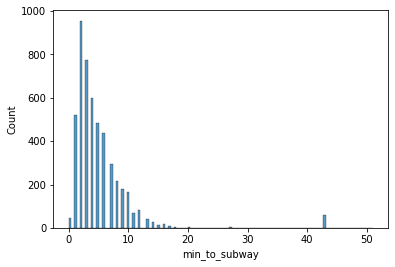

In [127]:
sns.histplot(rentals.min_to_subway)
plt.show()

In [128]:
rentals.min_to_subway.value_counts().sort_index()

0      45
1     520
2     955
3     774
4     597
5     482
6     438
7     294
8     217
9     181
10    164
11     69
12     81
13     42
14     29
15     15
16     16
17      9
18      6
20      2
27      4
37      1
43     58
51      1
Name: min_to_subway, dtype: int64

In [129]:
# Taking IQR of mins to subway
time_iqr = stat.iqr(rentals.min_to_subway)
time_median = np.median(rentals.min_to_subway)
print(time_iqr)
print(time_median)

4.0
4.0


In [130]:
rentals[rentals.min_to_subway == 43]['borough'].value_counts()

Manhattan    51
Queens        5
Brooklyn      2
Name: borough, dtype: int64

The most frequent time to get to the subway from the rental (mode) is 2 minutes with 955 enteries. There are outliers and right-skewness in the data, 58 enteries are 43 mins from the subway.

> to remove the effect of outliers, we can take IQR (50% of data). The Interquartile range is 4 mins, the median is also 4 mins.

> to investigate the 58 enteries of 43 mins, 51 of the rentals were located in Manhattan. why it takes somone 43 mins to get the subway in Manhattan? ._. could it be 4 mins and 30 seconds and was entered by mistake as 43?



# Size of rental

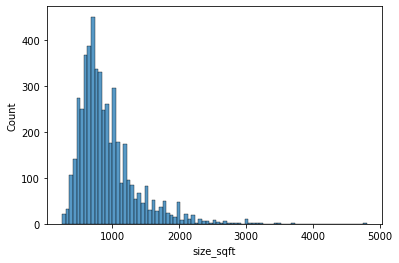

In [131]:
sns.histplot(rentals.size_sqft)
plt.show()

In [132]:
size_median = np.median(rentals.size_sqft)
size_max = np.max(rentals.size_sqft)
size_min = np.min(rentals.size_sqft)
print(size_median)
print('range:', size_min,'-', size_max, 'square feet')


800.0
range: 250 - 4800 square feet


In [133]:
size_iqr = stat.iqr(rentals.size_sqft)
print(size_iqr)

461.0


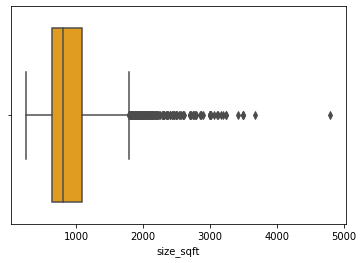

In [134]:
sns.boxplot(x=rentals.size_sqft, color = 'orange')
plt.show()

In [135]:
# to check the rentals with 800 square feet available in West Village
rentals[rentals.size_sqft == 800][rentals.neighborhood == 'West Village']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
1434,1556,65827777,5600,1.0,1,800,5,4.0,86,no,no,no,yes,yes,no,no,no,West Village,All Downtown,Manhattan
1662,197,81950429,4500,1.0,1,800,2,3.0,96,no,no,no,no,no,no,no,no,West Village,All Downtown,Manhattan
4002,7809,81078649,6800,1.0,1,800,2,8.0,121,no,no,no,no,no,no,no,no,West Village,All Downtown,Manhattan


### Categorical

# Boroughs and Submarkets

In [136]:
rentals.borough.unique()

array(['Manhattan', 'Queens', 'Brooklyn'], dtype=object)

In [137]:
# frequency of rentals in each borough
rentals.borough.value_counts()

Manhattan    3539
Brooklyn     1013
Queens        448
Name: borough, dtype: int64

In [138]:
# proprtion table of rentals in each borough
# there are no missing values, as we check above
rentals.borough.value_counts(normalize= True)

Manhattan    0.7078
Brooklyn     0.2026
Queens       0.0896
Name: borough, dtype: float64

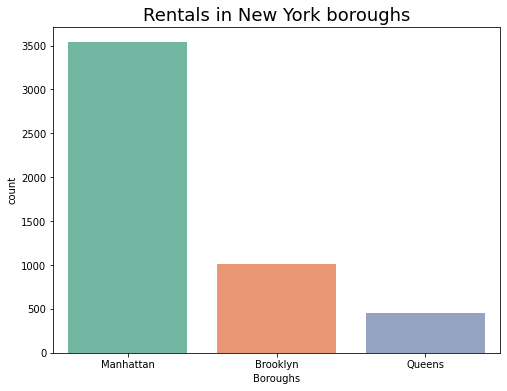

In [139]:
plt.figure(figsize=(8,6))
sns.countplot(x=rentals.borough, order= rentals.borough.value_counts().index, palette= 'Set2')
plt.xlabel('Boroughs')
plt.title('Rentals in New York boroughs', fontsize= 18)
plt.show()

The majority of the offered rentals are located in Manhattan (70.1%), very few are located in Queens (8.9%).

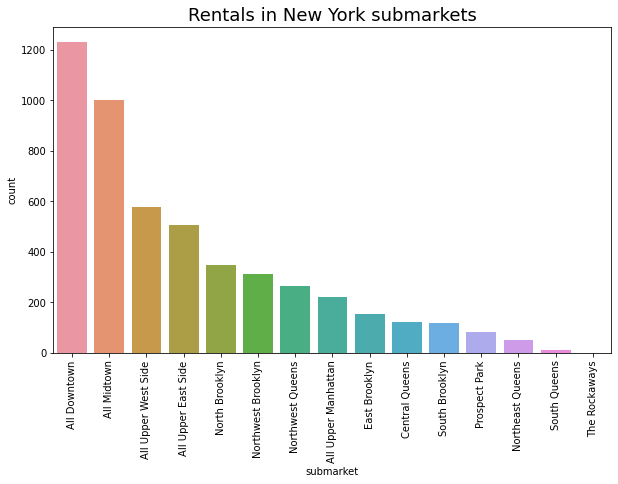

In [140]:
plt.figure(figsize=(10,6))
sns.countplot(x= rentals.submarket, order= rentals.submarket.value_counts().index)
plt.xticks(rotation= 90)
plt.title('Rentals in New York submarkets', fontsize= 18)
plt.show()

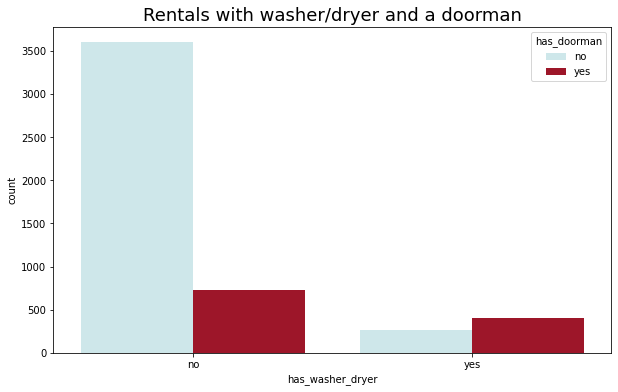

In [141]:
# looking for rentals with washer/dryer and a doorman

plt.figure(figsize=(10, 6))
sns.countplot(x= rentals.has_washer_dryer, hue= rentals.has_doorman, palette=['#C9EBEF', '#B30019'])
plt.title('Rentals with washer/dryer and a doorman', fontsize= 18)
plt.show()

In [142]:
rentals[rentals.has_washer_dryer == 'yes'][rentals.has_doorman == 'yes'][rentals.has_dishwasher == 'yes']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
19,6594,9417041,4875,1.0,1,900,1,14.0,52,yes,no,yes,yes,yes,yes,no,yes,East Village,All Downtown,Manhattan
42,4678,41713885,7495,2.0,2,1431,3,4.0,10,no,yes,yes,yes,yes,yes,no,yes,Upper West Side,All Upper West Side,Manhattan
97,2376,78690860,4600,1.0,1,890,2,8.0,10,no,no,yes,yes,yes,yes,no,no,Midtown East,All Midtown,Manhattan
116,8071,19187364,5595,2.0,2,1170,4,28.0,85,yes,yes,yes,yes,yes,yes,no,yes,Financial District,All Downtown,Manhattan
146,7418,57327522,5475,1.0,1,1094,2,38.0,30,no,yes,yes,yes,yes,yes,no,yes,Midtown,All Midtown,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4981,9792,29203171,2995,0.0,1,622,5,4.0,31,no,yes,yes,yes,yes,yes,no,yes,Battery Park City,All Downtown,Manhattan
4990,1676,86914672,18000,3.0,2,2470,3,5.0,116,no,yes,yes,yes,yes,yes,no,yes,DUMBO,Northwest Brooklyn,Brooklyn
4994,7582,71691994,4210,1.0,1,532,3,8.0,16,yes,yes,yes,yes,yes,yes,no,yes,Chelsea,All Downtown,Manhattan
4996,5686,92994390,6675,2.0,2,988,5,10.0,9,yes,yes,yes,yes,yes,yes,no,yes,Tribeca,All Downtown,Manhattan


There are 407 offered rentals with washer/dryer and doorman, 254 of which has a dishwasher.